In [1]:
'''
Nearest Neighbor
Author: Rowel Atienza
Project: https://github.com/roatienza/Deep-Learning-Experiments
'''
# On command line: python3 regression_nn.py
# Prerequisite: tensorflow 1.0 (see tensorflow.org)


from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math

# Tunable parameters (Try changing the values and see what happens)
samples = 10

# xcoeff used by the model y
xcoeff = tf.transpose(tf.constant([[1., 1., 1.]]))

# Sample distribution x
x = tf.linspace(-2.5,2.5,samples)
# Correct the shape
a = tf.reshape(x,[samples,1])

# New inputs whose outputs are to be predicted using nearest neighbor
b = tf.linspace(-4.,4.,samples)

# Correct the shape
b = tf.reshape(b,[samples,1])

# Inputs to form y = a*a*xcoeff[0] + a*xcoeff[1] + xcoeff[2]
A = tf.concat([tf.concat([a*a,a],1),tf.ones_like(a)],1)

# Observed outputs
y = tf.matmul(A,xcoeff)
# noise = tf.random_normal(y.get_shape(),stddev=0.8)
noise = tf.sin(math.pi*a)
y = tf.add(y,noise)

# L1 distance of each b from sample distribution x
l1 = tf.abs(tf.subtract(x,b))
# get the nearest neighbor index
nn = tf.argmin(l1,1)

In [12]:
with tf.Session() as session:
    session.run(init)
    print(noise.eval())

[[-1.        ]
 [ 0.17364796]
 [ 0.9396927 ]
 [-0.50000024]
 [-0.7660444 ]
 [ 0.76604474]
 [ 0.49999943]
 [-0.93969285]
 [-0.17364751]
 [ 1.        ]]


[-2.5        -1.9444444  -1.3888888  -0.83333325 -0.27777767  0.2777779
  0.8333335   1.3888891   1.9444447   2.5       ]
[[-4.         -3.1111112  -2.2222223  -1.3333333  -0.44444442  0.44444466
   1.3333335   2.2222223   3.1111112   4.        ]]
[-2.5        -2.5        -2.5        -1.3888888  -0.27777767  0.2777779
  1.3888891   1.9444447   2.5         2.5       ]


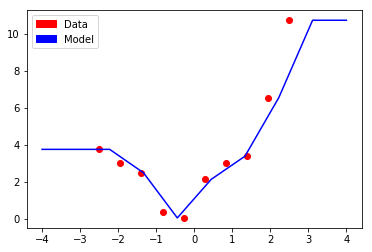

In [2]:
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    # the nearest neighbor to x based l1 between b and x
    xnn = x.eval()[nn.eval()]
    ann = tf.reshape(xnn, [samples, 1])
    # Use the same model generating inputs y = a*a*xcoeff[0] + a*xcoeff[1] + xcoeff[2]
    Ann = tf.concat([tf.concat([ann * ann, ann],1), tf.ones_like(ann)],1)
    # Predicted outputs
    yp = tf.matmul(Ann, xcoeff)
    noisenn = tf.sin(math.pi * ann)
    yp = tf.add(yp, noisenn)

    # Debugging: print model inputs (x), new inputs (b), nearest neighbor inputs (xnn)
    print(x.eval())
    print(b.eval().reshape([1,samples]))
    print(xnn)

    # Let's plot
    # a = np.array(a.eval())
    plt.plot(a.eval(), y.eval(), 'ro', b.eval(), yp.eval(), 'b')
    red = mpatches.Patch(color='red', label='Data')
    blue = mpatches.Patch(color='blue', label='Model')
    plt.legend(handles=[red,blue])
    plt.show()